In [95]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression

In [96]:
df = pd.read_csv("reg.csv")

In [97]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


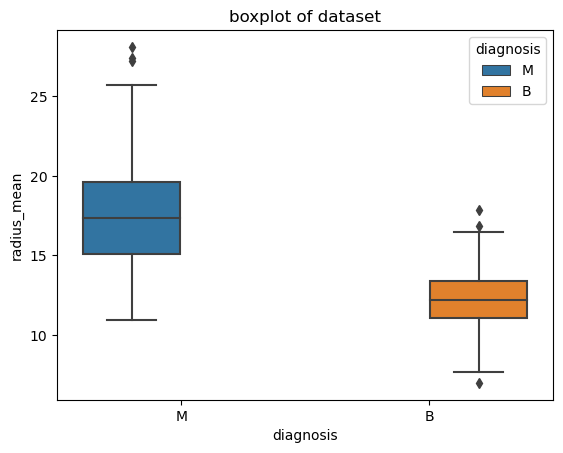

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df, y=df['radius_mean'], x='diagnosis', hue='diagnosis').set_title('boxplot of dataset')
plt.show()

In [99]:
y = df['area_mean'] 
X = df[['radius_mean', 'texture_mean', 'diagnosis']]

In [100]:
X.head()

,radius_mean,texture_mean,diagnosis
0,17.99,10.38,M
1,20.57,17.77,M
2,19.69,21.25,M
3,11.42,20.38,M
4,20.29,14.34,M


In [101]:
from sklearn import preprocessing
le_diagnosis = preprocessing.LabelEncoder()
le_diagnosis.fit(X['diagnosis'])
diagnosis = le_diagnosis.transform(X['diagnosis'])
X = X.drop(['diagnosis'], axis = 1)
X['diagnosis'] = diagnosis
X



,radius_mean,texture_mean,diagnosis
0,17.99,10.38,1
1,20.57,17.77,1
2,19.69,21.25,1
3,11.42,20.38,1
4,20.29,14.34,1
...,...,...,...
564,21.56,22.39,1
565,20.13,28.25,1
566,16.60,28.08,1
567,20.60,29.33,1


In [102]:
X['diagnosis'].unique()

array([1, 0])

In [103]:
X["radius_mean"].values.reshape(-1,1)

array([[17.99 ],
       [20.57 ],
       [19.69 ],
       [11.42 ],
       [20.29 ],
       [12.45 ],
       [18.25 ],
       [13.71 ],
       [13.   ],
       [12.46 ],
       [16.02 ],
       [15.78 ],
       [19.17 ],
       [15.85 ],
       [13.73 ],
       [14.54 ],
       [14.68 ],
       [16.13 ],
       [19.81 ],
       [13.54 ],
       [13.08 ],
       [ 9.504],
       [15.34 ],
       [21.16 ],
       [16.65 ],
       [17.14 ],
       [14.58 ],
       [18.61 ],
       [15.3  ],
       [17.57 ],
       [18.63 ],
       [11.84 ],
       [17.02 ],
       [19.27 ],
       [16.13 ],
       [16.74 ],
       [14.25 ],
       [13.03 ],
       [14.99 ],
       [13.48 ],
       [13.44 ],
       [10.95 ],
       [19.07 ],
       [13.28 ],
       [13.17 ],
       [18.65 ],
       [ 8.196],
       [13.17 ],
       [12.05 ],
       [13.49 ],
       [11.76 ],
       [13.64 ],
       [11.94 ],
       [18.22 ],
       [15.1  ],
       [11.52 ],
       [19.21 ],
       [14.71 ],
       [13.05 

In [104]:
le_radius_mean = preprocessing.LabelEncoder()
le_radius_mean.fit(X["radius_mean"])
le_radius_mean = le_radius_mean.transform(X["radius_mean"])
X = X.drop(["radius_mean"], axis = 1)
X["radius_mean"] = le_radius_mean
X

,texture_mean,diagnosis,radius_mean
0,10.38,1,370
1,17.77,1,426
2,21.25,1,406
3,20.38,1,98
4,14.34,1,418
...,...,...,...
564,22.39,1,438
565,28.25,1,413
566,28.08,1,340
567,29.33,1,429


In [105]:
le_texture_mean = preprocessing.LabelEncoder()
le_texture_mean.fit(X["texture_mean"])
le_texture_mean = le_texture_mean.transform(X["texture_mean"])
X = X.drop(["texture_mean"], axis = 1)
X["texture_mean"] = le_texture_mean
X

,diagnosis,radius_mean,texture_mean
0,1,370,1
1,1,426,186
2,1,406,324
3,1,98,297
4,1,418,60
...,...,...,...
564,1,438,370
565,1,413,463
566,1,340,458
567,1,429,467


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [107]:
df_lm = LogisticRegression()

In [108]:
df_lm = LogisticRegression(max_iter=1000)